In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

data = pd.read_csv("winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
data.dropna(inplace=True)

In [4]:
data.shape

(1599, 12)

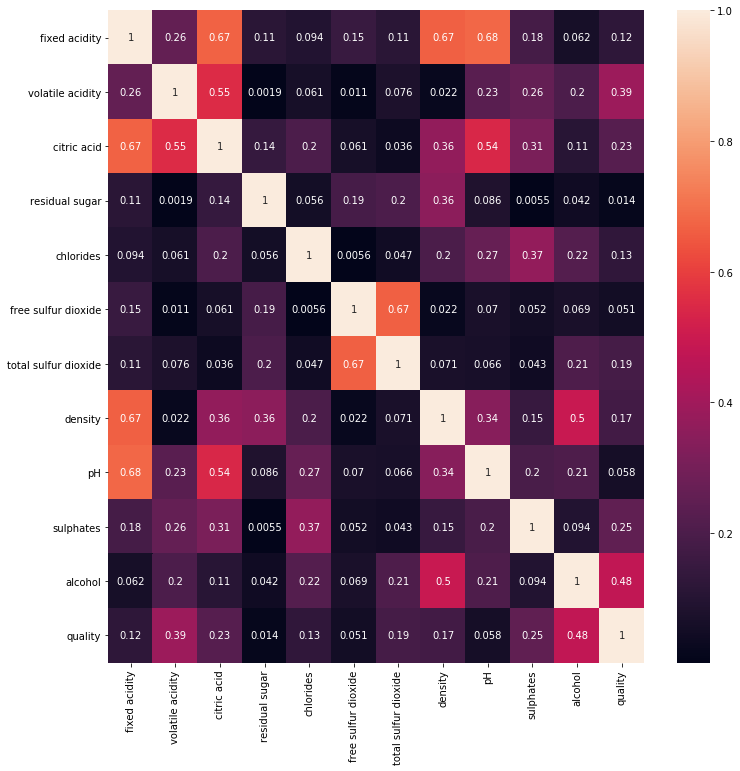

In [5]:
plt.subplots(figsize = (12,12))
cor = data.corr()
sb.heatmap(abs(data.corr()),annot=True)

In [25]:
cor = data.corr()["quality"].drop("quality")
abscor = cor.abs()
features = abscor[abscor>0.2].index.tolist()
print(features)

['volatile acidity', 'citric acid', 'sulphates', 'alcohol']


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn import metrics 

x = data[features]
y = data['quality']
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [30]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [39]:
pred = reg.predict(x_test)
print(reg.score(x_test,y_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))

0.3182376686306423
Mean Squared Error: 0.47653482556889676
